In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing Data

In [3]:
# Importing the Dataset
adidas_sales = pd.read_csv('C:/Users/Andrew/Documents/Data Projects/Amazon-Sales-Analysis/Amazon-Sales-Analysis/adidassales.csv')

In [4]:
adidas_sales.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$500,000","$125,000",25%,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$625,000","$312,500",50%,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$450,000","$135,000",30%,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$380,000","$133,000",35%,Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$371,250","$129,938",35%,Outlet


In [5]:
adidas_sales.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [6]:
adidas_sales.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [7]:
adidas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## Data Cleaning

In [8]:
#Removing unnecessary columns
adidas_sales=adidas_sales.drop(['Retailer ID', 'City'], axis=1)

#Adding column for adidas profit
#adidas

In [9]:
# Removing symbols in observations
adidas_sales['Operating Profit'] = adidas_sales['Operating Profit'].str.replace("$",'')
adidas_sales['Operating Profit'] = adidas_sales['Operating Profit'].str.replace(",",'')
adidas_sales['Price per Unit'] = adidas_sales['Price per Unit'].str.replace("$",'')
adidas_sales['Total Sales'] = adidas_sales['Total Sales'].str.replace("$",'')
adidas_sales['Total Sales'] = adidas_sales['Total Sales'].str.replace(",",'')
adidas_sales['Units Sold'] = adidas_sales['Units Sold'].str.replace(",",'')
adidas_sales['Operating Margin'] = adidas_sales['Operating Margin'].str.replace("%",'')

C:\Users\Andrew\AppData\Local\Temp\ipykernel_24956\2652676766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adidas_sales['Operating Profit'] = adidas_sales['Operating Profit'].str.replace("$",'')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_24956\2652676766.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adidas_sales['Price per Unit'] = adidas_sales['Price per Unit'].str.replace("$",'')
C:\Users\Andrew\AppData\Local\Temp\ipykernel_24956\2652676766.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  adidas_sales

In [10]:
# Renaming columns for clarity
adidas_sales.rename(columns={'Operating Profit': 'Operating Profit ($)', 'Total Sales': 'Total Sales ($)',
                            'Price per Unit': 'Price per Unit ($)'}, inplace=True)

In [11]:
# Converting data type of numeric columns
adidas_sales['Operating Profit ($)'] = pd.to_numeric(adidas_sales['Operating Profit ($)'])
adidas_sales['Price per Unit ($)'] = pd.to_numeric(adidas_sales['Price per Unit ($)'])
adidas_sales['Total Sales ($)'] = pd.to_numeric(adidas_sales['Total Sales ($)'])
adidas_sales['Operating Margin'] = pd.to_numeric(adidas_sales['Operating Margin'])
adidas_sales['Units Sold'] = pd.to_numeric(adidas_sales['Units Sold'])
adidas_sales['Invoice Date'] = pd.to_datetime(adidas_sales['Invoice Date'])

In [12]:
# Creating a column for Adidas' profit
adidas_sales['Operating Margin'] = adidas_sales['Operating Margin']/100
adidas_profit = adidas_sales['Total Sales ($)'] * adidas_sales['Operating Margin']
adidas_sales['Adidas Profit'] = adidas_profit

In [77]:
adidas_sales.to_csv("AdidasSalesNew.csv")

In [13]:
adidas_sales.head()

,Retailer,Invoice Date,Region,State,Product,Price per Unit ($),Units Sold,Total Sales ($),Operating Profit ($),Operating Margin,Sales Method,Adidas Profit
0,Foot Locker,2020-01-01,Northeast,New York,Men's Street Footwear,50.0,1200,600000,300000,0.50,In-store,300000.0
1,Foot Locker,2020-01-02,Northeast,New York,Men's Athletic Footwear,50.0,1000,500000,150000,0.30,In-store,150000.0
2,Foot Locker,2020-01-03,Northeast,New York,Women's Street Footwear,40.0,1000,400000,140000,0.35,In-store,140000.0
3,Foot Locker,2020-01-04,Northeast,New York,Women's Athletic Footwear,45.0,850,382500,133875,0.35,In-store,133875.0
4,Foot Locker,2020-01-05,Northeast,New York,Men's Apparel,60.0,900,540000,162000,0.30,In-store,162000.0


## Data Analysis & Visualizations

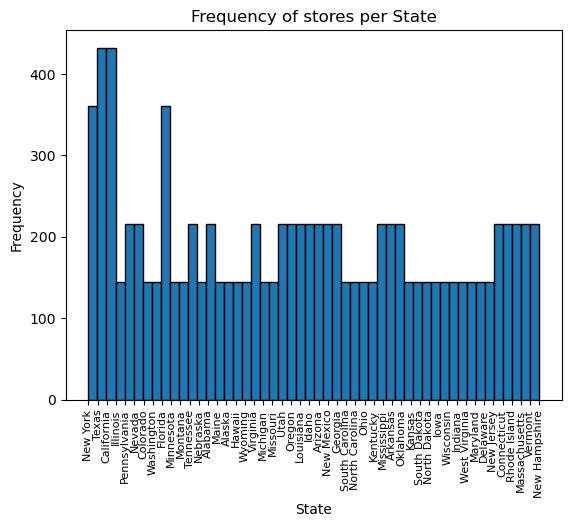

In [14]:
# Frequency plot for stores by state
plt.hist(adidas_sales['State'], bins=50, edgecolor = "black")
plt.title('Frequency of stores per State')
plt.ylabel('Frequency')
plt.xlabel('State')
plt.xticks(rotation=90, fontsize=8)
plt.show()

In [70]:
#adidas_sales['State'].value_counts()

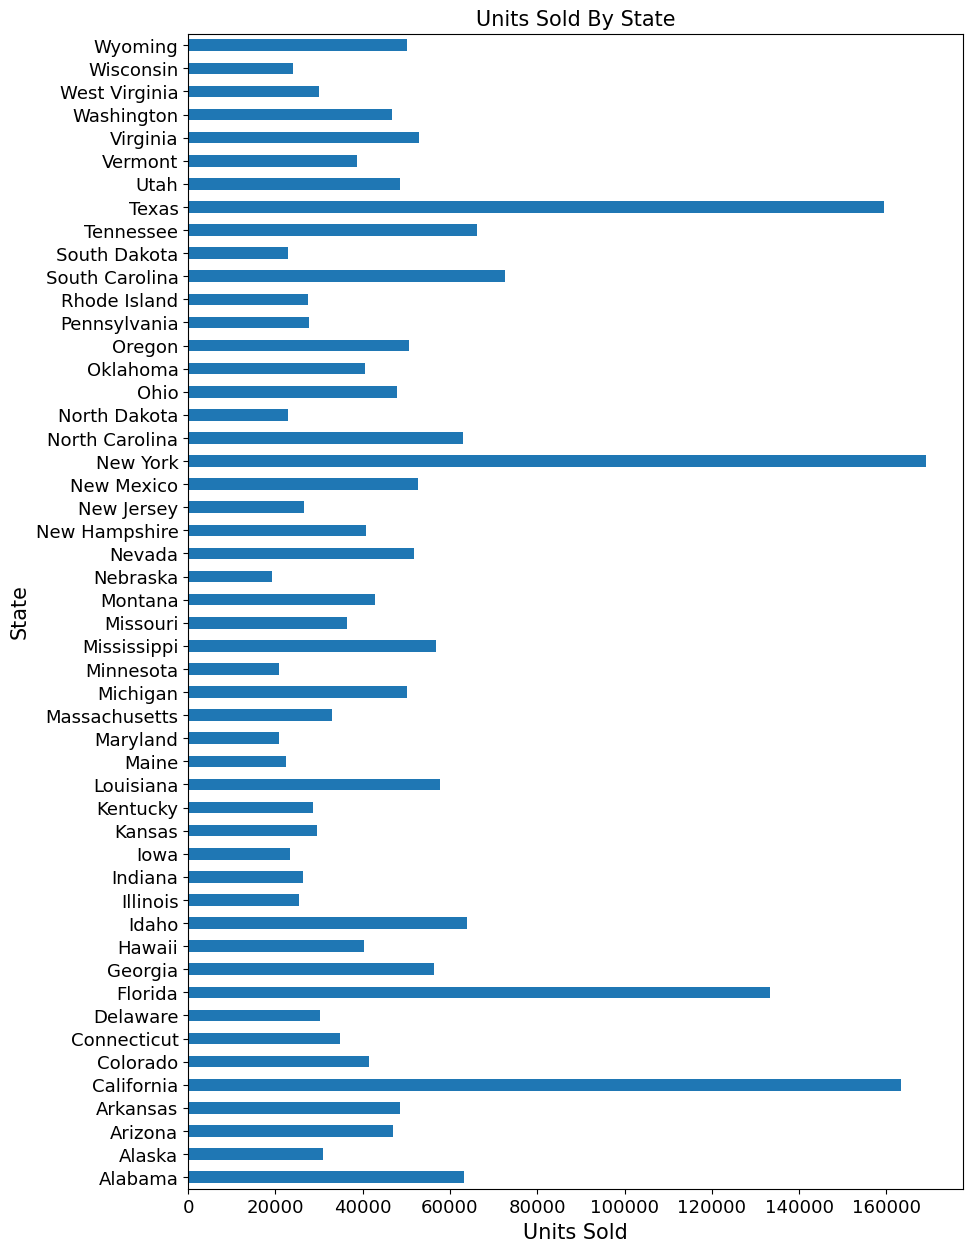

In [16]:
# Plotting Unit Sales per State
plt.figure(figsize=(10,15))
adidas_sales.groupby(['State'])['Units Sold'].sum().plot.barh()
plt.title('Units Sold By State', fontsize=15)
plt.ylabel('State', fontsize=15)
plt.xlabel('Units Sold', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

In [17]:
#adidas_sales['Product'].value_counts()

Men's Street Footwear        1610
Men's Athletic Footwear      1610
Women's Street Footwear      1608
Women's Apparel              1608
Women's Athletic Footwear    1606
Men's Apparel                1606
Name: Product, dtype: int64

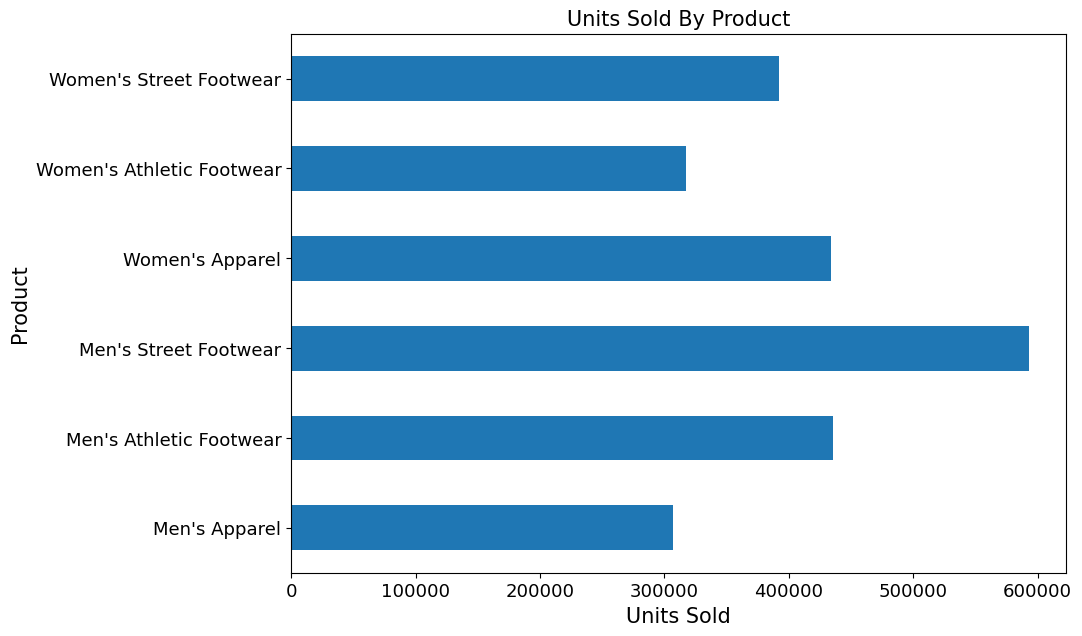

In [21]:
# Plotting the Units sold by product
plt.figure(figsize=(10,7))
adidas_sales.groupby(['Product'])['Units Sold'].sum().plot.barh()
plt.title('Units Sold By Product', fontsize=15)
plt.ylabel('Product', fontsize=15)
plt.xlabel('Units Sold', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

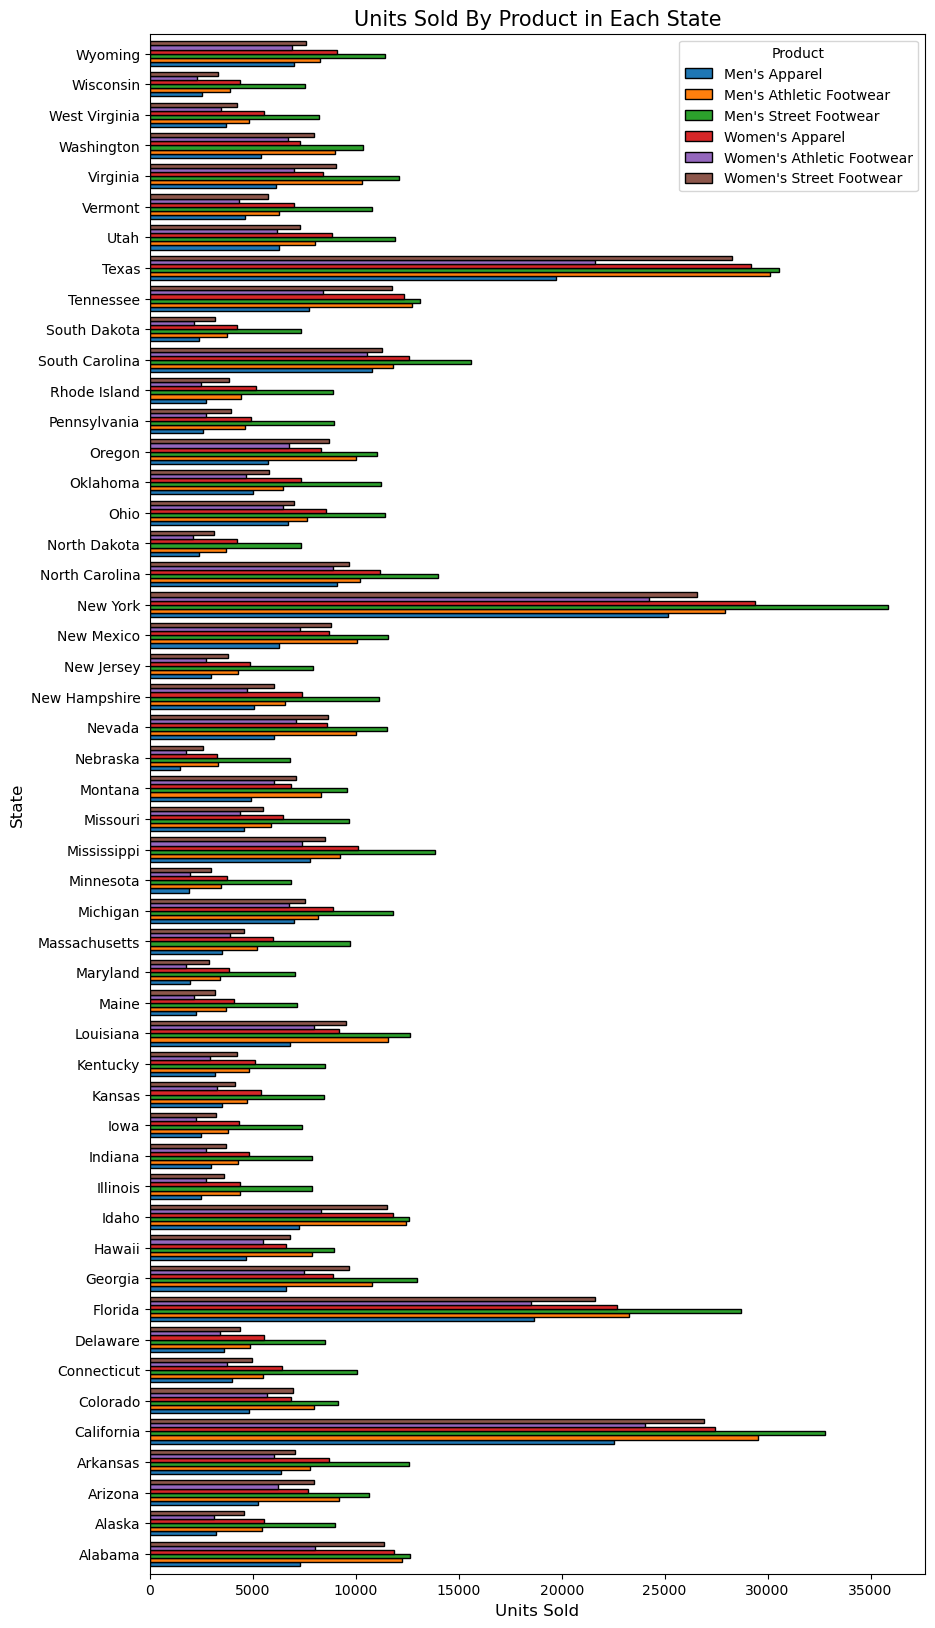

In [74]:
# Plotting the Units sold in each state categorized by product type
adidas_sales.groupby(['State','Product'])['Units Sold'].sum().unstack().plot.barh(figsize=(10,20),width=0.8, edgecolor='black')
plt.title('Units Sold By Product in Each State', fontsize=15)
plt.ylabel('State', fontsize=12)
plt.xlabel('Units Sold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

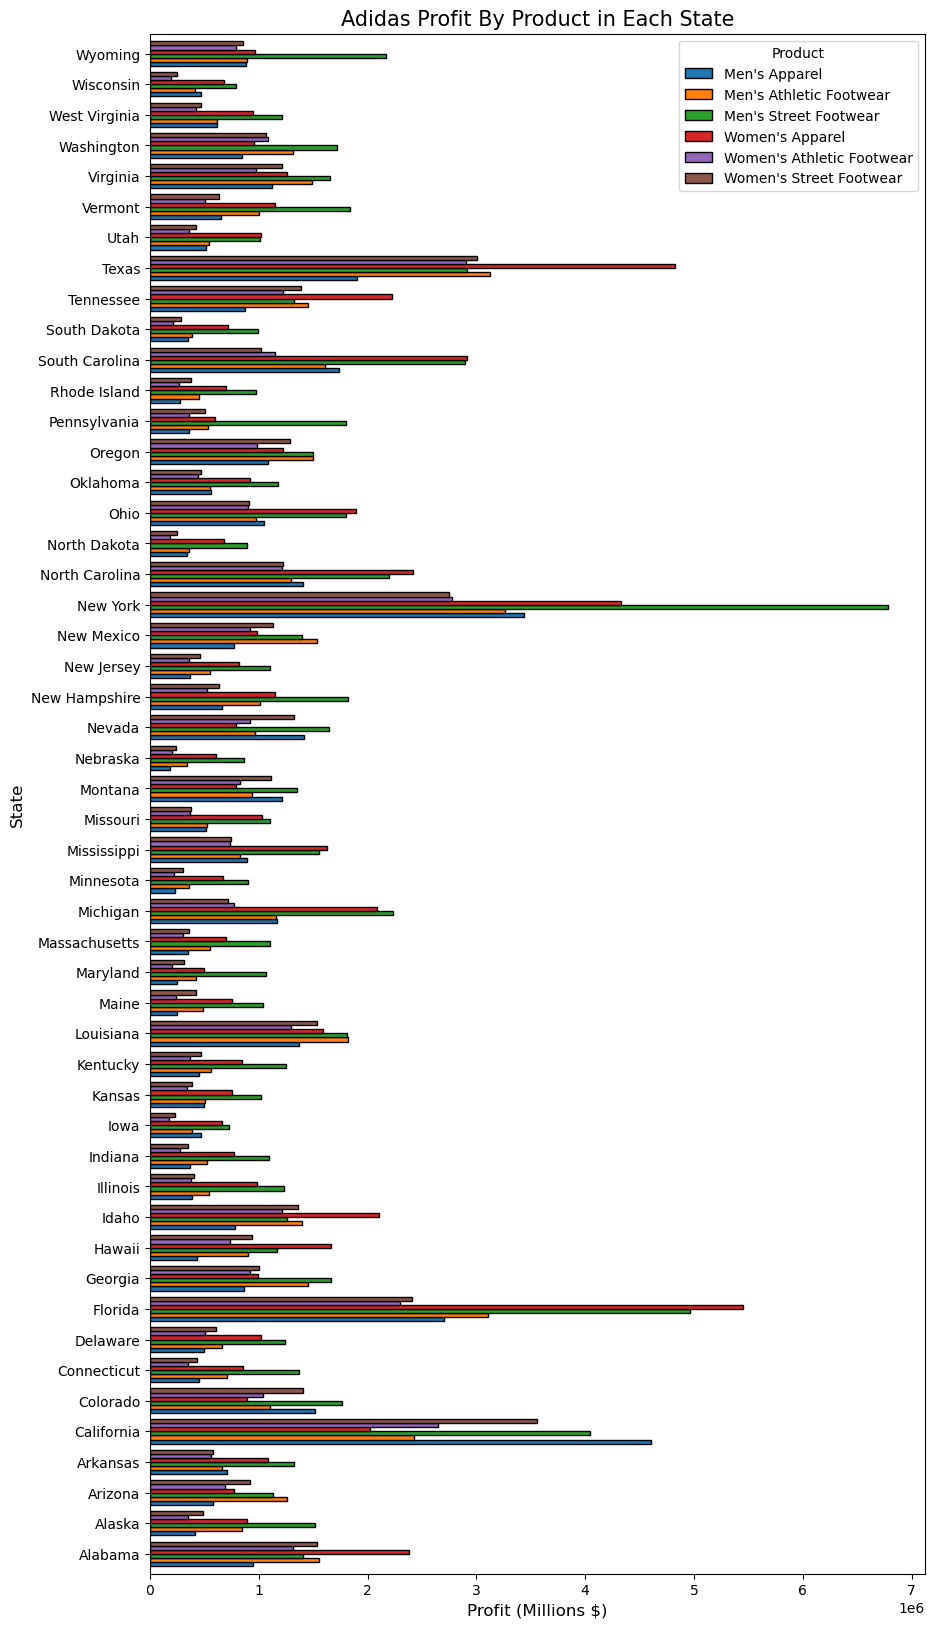

In [79]:
# Plotting the Units sold in each state categorized by product type
adidas_sales.groupby(['State','Product'])['Adidas Profit'].sum().unstack().plot.barh(figsize=(10,20),width=0.8, edgecolor='black')
plt.title('Adidas Profit By Product in Each State', fontsize=15)
plt.ylabel('State', fontsize=12)
plt.xlabel('Profit (Millions $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [80]:
#adidas_sales['Sales Method'].value_counts()

Online      4889
Outlet      3019
In-store    1740
Name: Sales Method, dtype: int64

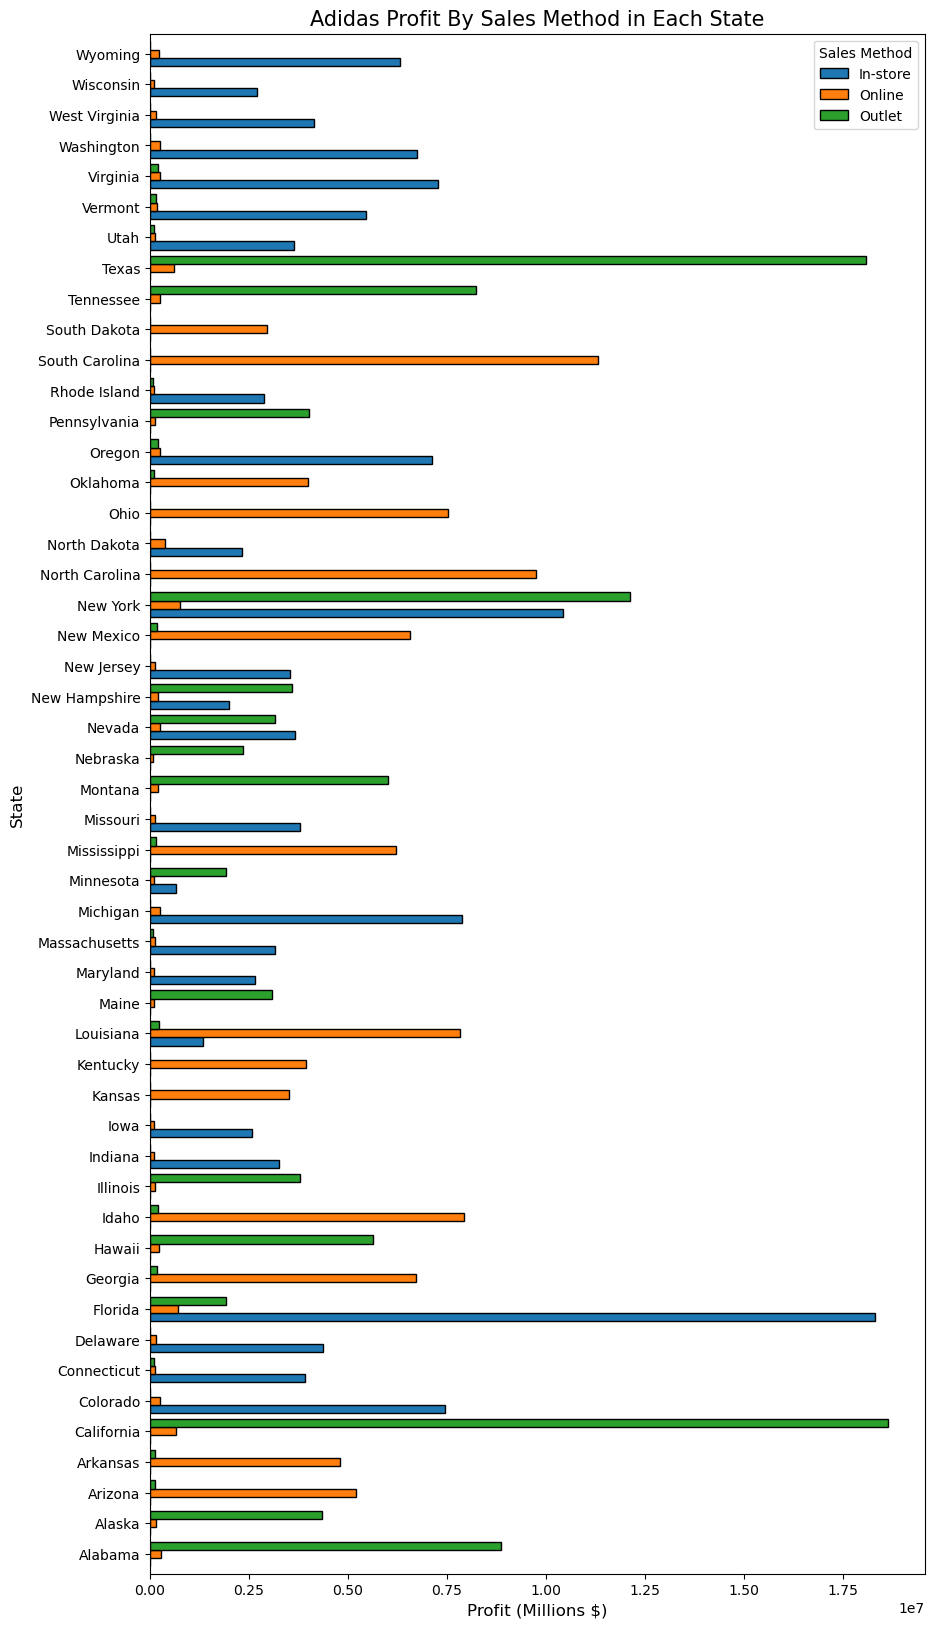

In [84]:
# Plotting the Profit from each state categorized by product type
adidas_sales.groupby(['State','Sales Method'])['Adidas Profit'].sum().unstack().plot.barh(figsize=(10,20),width=0.8, edgecolor='black')
plt.title('Adidas Profit By Sales Method in Each State', fontsize=15)
plt.ylabel('State', fontsize=12)
plt.xlabel('Profit (Millions $)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

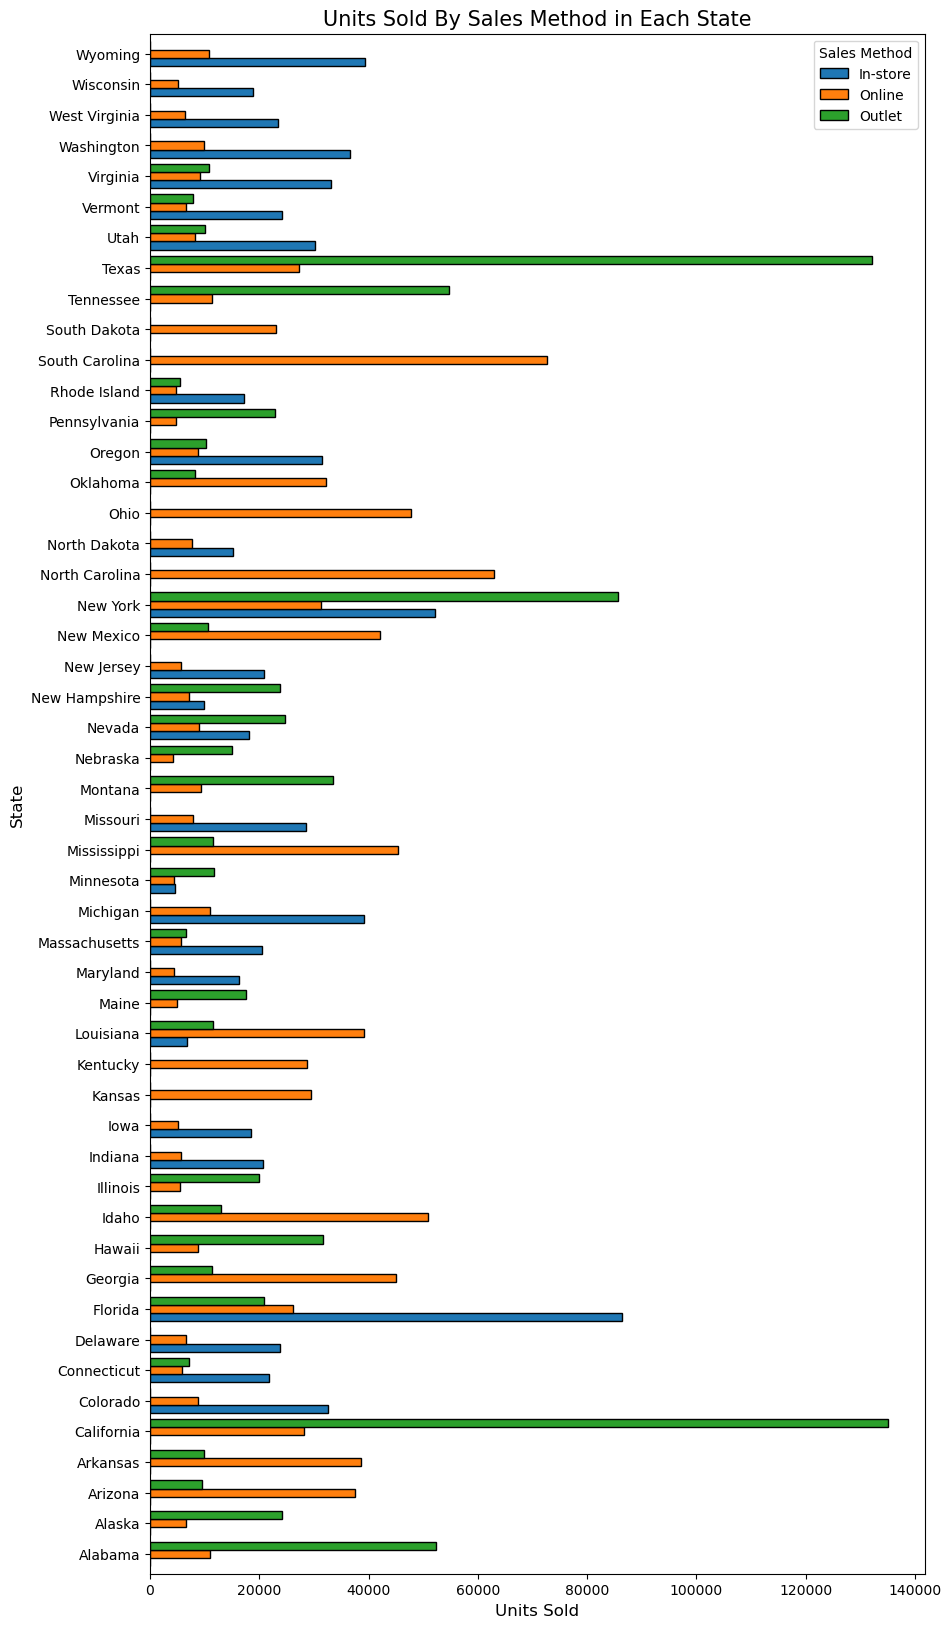

In [87]:
# Plotting the Units Sold from each state categorized by Sales Method
adidas_sales.groupby(['State','Sales Method'])['Units Sold'].sum().unstack().plot.barh(figsize=(10,20),width=0.8, edgecolor='black')
plt.title('Units Sold By Sales Method in Each State', fontsize=15)
plt.ylabel('State', fontsize=12)
plt.xlabel('Units Sold', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()